In [18]:
import json 
import pandas as pd 
import numpy as np 
import re

In [18]:
file_dir = '../Resource/'
f'{file_dir}wikipedia-movies.json'

'../Resource/wikipedia-movies.json'

## EXTRACT

> load josn file -- into list of dicitonaries

In [19]:
with open(f'{file_dir}wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [20]:
len(wiki_movies_raw)

7311

In [21]:
wiki_movies_raw[0].keys()

dict_keys(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by', 'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by', 'Music by', 'Cinematography', 'Edited by', 'Productioncompany ', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office'])

In [22]:
wiki_movies_raw[3609].keys()

dict_keys(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by', 'Written by', 'Starring', 'Distributed by', 'Release date', 'Running time', 'Language', 'Box office'])

In [23]:
wiki_movies_raw[3609]

{'url': 'https://en.wikipedia.org/wiki/Book_of_Love_(2004_film)',
 'year': 2004,
 'imdb_link': 'https://www.imdb.com/title/tt0376006/',
 'title': 'Book of Love',
 'Directed by': 'Alan Brown',
 'Produced by': 'Robert Ahrens',
 'Written by': 'Alan Brown',
 'Starring': ["Frances O'Connor",
  'Bryce Dallas Howard',
  'Simon Baker',
  'Gregory Smith'],
 'Distributed by': 'Sundance',
 'Release date': ['January 18, 2004', '(', '2004-01-18', ')'],
 'Running time': '83 min',
 'Language': 'English',
 'Box office': '$1,382,259'}

In [24]:
wiki_movies_raw[-5].keys()

dict_keys(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by', 'Screenplay by', 'Based on', 'Starring', 'Music by', 'Cinematography', 'Edited by', 'Productioncompanies ', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office'])

In [25]:
wiki_movies_raw[-5]

{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
 'year': 2018,
 'imdb_link': 'https://www.imdb.com/title/tt1255919/',
 'title': 'Holmes & Watson',
 'Directed by': 'Etan Cohen',
 'Produced by': ['Will Ferrell',
  'Adam McKay',
  'Jimmy Miller',
  'Clayton Townsend'],
 'Screenplay by': 'Etan Cohen',
 'Based on': ['Sherlock Holmes',
  'and',
  'Dr. Watson',
  'by',
  'Sir Arthur Conan Doyle'],
 'Starring': ['Will Ferrell',
  'John C. Reilly',
  'Rebecca Hall',
  'Rob Brydon',
  'Steve Coogan',
  'Ralph Fiennes'],
 'Music by': 'Mark Mothersbaugh',
 'Cinematography': 'Oliver Wood',
 'Edited by': 'Dean Zimmerman',
 'Productioncompanies ': ['Columbia Pictures',
  'Gary Sanchez Productions',
  'Mosaic Media Group',
  'Mimran Schur Pictures'],
 'Distributed by': 'Sony Pictures Releasing',
 'Release date': ['December 25, 2018',
  '(',
  '2018-12-25',
  ')',
  '(United States)'],
 'Running time': '90 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$42 million

In [157]:
kaggle_metadata = pd.read_csv('C:/Users/Donne/OneDrive/UT_Data_Analytics/Analysis Projects/Mod8_Movies_ETL/Resource/movies_metadata.csv', low_memory=False)

In [200]:
ratings = pd.read_csv('C:/users/Donne/OneDrive/UT_Data_Analytics/Analysis Projects/Mod8_Movies_ETL/Resource/ratings.csv')

In [158]:
kaggle_metadata.shape
ratings.shape

(45466, 24)

(100004, 4)

In [159]:
kaggle_metadata.loc[2076]['spoken_languages']

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'it', 'name': 'Italiano'}]"

In [160]:
kaggle_metadata.sample(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
3913,False,NaN,4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,31583,tt0097662,en,Kill Me Again,"After Faye and her psychotic boyfriend, Vince,...",...,1989-10-27,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Her last request was his first mistake.,Kill Me Again,False,5.7,21.0
12645,False,NaN,750000,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",http://www.mandylane.co.uk,9022,tt0490076,en,All the Boys Love Mandy Lane,"Beautiful Mandy Lane isn't a party girl but, w...",...,2008-02-15,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Everyone is dying to be with her. Someone is k...,All the Boys Love Mandy Lane,False,5.7,211.0
16138,False,"{'id': 158373, 'name': 'The Lost Skeleton Coll...",600,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://www.lostskeletonreturnsagain.com/,44687,tt1199494,en,The Lost Skeleton Returns Again,THE LOST SKELETON RETURNS AGAIN takes on a who...,...,2010-08-17,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,So Terrifying You'll Wish It Were Only a Movie!,The Lost Skeleton Returns Again,False,7.0,9.0


In [47]:
ratings.sample(5)

,userId,movieId,rating,timestamp
11223,73,27706,3.0,1255596884
88414,587,3168,4.0,1123001592
7371,47,588,4.0,832228859
65538,466,2395,4.0,944979809
8673,56,89759,4.0,1467003383


>##  Transform 

In [67]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [69]:
wiki_movies_df.shape

(7311, 193)

In [68]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# reviewing the 193 columns 
print(wiki_movies_df.columns.to_list())

['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by', 'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by', 'Music by', 'Cinematography', 'Edited by', 'Productioncompany ', 'Distributed by', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office', 'Written by', 'Genre', 'Theme music composer', 'Country of origin', 'Original language(s)', 'Producer(s)', 'Editor(s)', 'Production company(s)', 'Original network', 'Original release', 'Productioncompanies ', 'Executive producer(s)', 'Production location(s)', 'Distributor', 'Picture format', 'Audio format', 'Voices of', 'Followed by', 'Composer(s)', 'Created by', 'Also known as', 'Opening theme', 'No. of episodes', 'Preceded by', 'Author', 'Publisher', 'Publication date', 'Media type', 'Pages', 'ISBN', 'OCLC', 'LC Class', 'Cover artist', 'Series', 'Set in', 'Adaptation by', 'Suggested by', 'Biographical data', 'Born', 'Died', 'Resting place', 'Occupation', 'Years active', 'Spouse(s)', 'Childre

___

> list comprehensin breakdown 

In [81]:
wiki_movies[0]

{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0098987/',
 'title': 'The Adventures of Ford Fairlane',
 'Directed by': 'Renny Harlin',
 'Produced by': ['Steve Perry', 'Joel Silver'],
 'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
 'Story by': ['David Arnott', 'James Cappe'],
 'Based on': ['Characters', 'by Rex Weiner'],
 'Starring': ['Andrew Dice Clay',
  'Wayne Newton',
  'Priscilla Presley',
  'Lauren Holly',
  'Morris Day',
  'Robert Englund',
  "Ed O'Neill"],
 'Narrated by': 'Andrew "Dice" Clay',
 'Music by': ['Cliff Eidelman', 'Yello'],
 'Cinematography': 'Oliver Wood',
 'Edited by': 'Michael Tronick',
 'Productioncompany ': 'Silver Pictures',
 'Distributed by': '20th Century Fox',
 'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
 'Running time': '102 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$20 million',
 'Box office': '$21.4 milli

In [97]:
['year' in wiki_movies[0]]

[True]

In [98]:
['Budget' in wiki_movies_raw[0]]

[True]

In [124]:
samp_movie = [i for i in wiki_movies_raw if 'year' in i]
len(samp_movie)

7153

-----

In [94]:
# use list comprehension to filter raw json data by criterias 
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [128]:
# make the a gain data frame, with now reduced colums and rows
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.shape

(7080, 78)

In [146]:
wiki_movies_df[wiki_movies_df.columns[0:18]].sample(2)
wiki_movies_df[wiki_movies_df.columns[19:38]].sample(2)
wiki_movies_df[wiki_movies_df.columns[39:58]].sample(2)
wiki_movies_df[wiki_movies_df.columns[59:78]].sample(2)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,Narrated by,Music by,Cinematography,Edited by,Productioncompany,Distributed by,Release date,Running time
5381,https://en.wikipedia.org/wiki/Puss_in_Boots_(2...,2011,https://www.imdb.com/title/tt0448694/,Puss in Boots,Chris Miller,"[Joe M. Aguilar, Latifa Ouaou]",Tom Wheeler,"[Brian Lynch, Will Davies, Tom Wheeler]",NaN,"[Antonio Banderas, Salma Hayek, Zach Galifiana...",NaN,Henry Jackman,NaN,Eric Dapkewicz,DreamWorks Animation,Paramount Pictures,"[October 16, 2011, (, 2011-10-16, ), (, Allure...",90 minutes
1370,https://en.wikipedia.org/wiki/Problem_Child_3:...,1995,https://www.imdb.com/title/tt0114188/,Problem Child 3,Greg Beeman,NaN,NaN,NaN,"[Characters by, Scott Alexander and Larry Kara...","[William Katt, Justin Chapman, Sherman Howard,...",NaN,David Michael Frank,Peter Smokler,NaN,NaN,NaN,NaN,84 minutes


,Language,Budget,Box office,Written by,Genre,Theme music composer,Country of origin,Original language(s),Producer(s),Editor(s),Production company(s),Original network,Original release,Productioncompanies,Executive producer(s),Production location(s),Distributor,Picture format,Audio format
1650,English,"$500,000","$502,313",Lisa King,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,NaN,NaN,NaN,"[Alison Rosenfeld, James Desmarais]","[Mystery, Romance, Thriller]",Richard Stone,United States,English,"[Gary W. Goldstein, Chad Cooperman, Bernie Gol...",Michael Brown,"[Nevermore Productions, The Steve Tisch Company]",CBS,"[May 5, 1991, (, 1991-05-05, )]",NaN,Mireille Soria,"[Malibu, California, Santa Monica Pier]","[CBS, Artisan Home Video]",Color,Stereo


,Followed by,Composer(s),Created by,Also known as,Opening theme,No. of episodes,Preceded by,Adaptation by,Suggested by,Traditional,Mandarin,Released,Recorded,Venue,Length,Label,Director,Producer,Animation by
923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Simplified,French,Camera setup,Screen story by,Hangul,Revised Romanization,McCune–Reischauer,Original title,Japanese,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
5313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# adding another layer to list comprehension filter based on results
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [151]:
# only local version of movie will be returned, not the golbal orignal 
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

In [153]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

> Cleaning alternate titles / combing columns

In [162]:
print(sorted(wiki_movies_df.columns.tolist()))

['Adaptation by', 'Also known as', 'Animation by', 'Arabic', 'Audio format', 'Based on', 'Box office', 'Budget', 'Camera setup', 'Cantonese', 'Chinese', 'Cinematography', 'Color process', 'Composer(s)', 'Country', 'Country of origin', 'Created by', 'Directed by', 'Director', 'Distributed by', 'Distributor', 'Edited by', 'Editor(s)', 'Executive producer(s)', 'Followed by', 'French', 'Genre', 'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Label', 'Language', 'Length', 'Literally', 'Mandarin', 'McCune–Reischauer', 'Music by', 'Narrated by', 'No. of episodes', 'Opening theme', 'Original language(s)', 'Original network', 'Original release', 'Original title', 'Picture format', 'Polish', 'Preceded by', 'Produced by', 'Producer', 'Producer(s)', 'Production company(s)', 'Production location(s)', 'Productioncompanies ', 'Productioncompany ', 'Recorded', 'Release date', 'Released', 'Revised Romanization', 'Romanized', 'Running time', 'Russian', 'Screen story by', 'Screenplay by', 'Simplified', 'Star

In [187]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

<div class="alert alert-block alert-info">
<b>Note:</b></div>

>  When converting dataframe to dictionary, columns become keys.<br>
>
> ```alt_titles``` will be a dictonary of dictionaries e.g a column with eah index having multiple values.<br>
>
> The provided list contains alternate columns(keys) thatt can be combined into one (theryre all languages)<br>
> ```if key in movie: alt_titles[key] = movie[key] ``` if "key" from list is in dictionary then add key and its values (```movie[key]```) to the alt_titles dictinary<br>
> ```movie.pop(key)``` then remove key from movies dictionary (which is the converted data frame)<br>
> ```if len(alt_titles) > 0: movie['alt_titles'] = alt_titles ``` if key,vlaues are present within ```alt_titles``` then add them (which would be a combination of all alt titles from a previous step) to the movies dictionary, as its own combined key, value pairing (ultimatly becoming a singular alt_titles column once converted to a dataframe). 

In [217]:
# make a list of ceaned movies with a list comprenhension 
# using clenaing function on "wiki_movies" which is in dicitonary format from previosuly imported json data
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [215]:
wiki_movies_df = pd.DataFrame(clean_movies)

In [228]:
wiki_movies_df[wiki_movies_df['alt_titles'].notnull()][['alt_titles']].sample(7)

,alt_titles
7070,{'Polish': 'Zimna wojna'}
6620,{'Chinese': '摇滚藏獒'}
7058,{'Arabic': 'کفرناحوم‎'}
3413,"{'Hangul': '원더풀 데이즈', 'McCune–Reischauer': 'Wŏ..."
6862,{'Hebrew': 'פוֹקְסטְרוֹט'}
6719,{'Yiddish': 'מנשה'}
4790,{'Original title': 'ואלס עם באשיר'}


In [239]:
wiki_movies_df.iloc[3413]['alt_titles']['Hangul']             

'원더풀 데이즈'

> cleaning columns/ column consildation 

In [ ]:
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)

> adding to cleaning funciton 

In [241]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [242]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)

In [244]:
print(sorted(wiki_movies_df.columns.tolist()))

['Animation by', 'Audio format', 'Based on', 'Box office', 'Budget', 'Cinematography', 'Color process', 'Composer(s)', 'Country', 'Created by', 'Director', 'Distributor', 'Editor(s)', 'Executive producer(s)', 'Followed by', 'Genre', 'Label', 'Language', 'McCune–Reischauer', 'Narrated by', 'Original language(s)', 'Original network', 'Picture format', 'Preceded by', 'Producer(s)', 'Production company(s)', 'Production location(s)', 'Recorded', 'Release date', 'Running time', 'Starring', 'Suggested by', 'Venue', 'Voices of', 'Writer(s)', 'alt_titles', 'imdb_link', 'title', 'url', 'year']


> removing duplicate rows

In [249]:
wiki_movies_df.sample(2)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer
4578,https://en.wikipedia.org/wiki/Walk_Hard:_The_D...,2007,https://www.imdb.com/title/tt0841046/,Walk Hard: The Dewey Cox Story,NaN,"[John C. Reilly, Jenna Fischer, Tim Meadows, K...",NaN,Uta Briesewitz,"[December 21, 2007, (, 2007-12-21, )]",96 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5282,https://en.wikipedia.org/wiki/The_Dilemma,2011,https://www.imdb.com/title/tt1578275/,The Dilemma,NaN,"[Vince Vaughn, Kevin James, Jennifer Connelly,...",NaN,Salvatore Totino,"[January 14, 2011, (, 2011-01-14, )]",118 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
# use regex to extract imdb id from the url column 
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

In [251]:
wiki_movies_df.sample(2)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
1875,https://en.wikipedia.org/wiki/Elvis_Meets_Nixon,1997,https://www.imdb.com/title/tt0122474/,Elvis Meets Nixon,NaN,"[Rick Peters, Bob Gunton]",NaN,Michael Storey,"August 10, 1997",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0122474
2560,https://en.wikipedia.org/wiki/The_Waiting_Game...,1999,https://www.imdb.com/title/tt0235872/,The Waiting Game,NaN,Will Arnett,NaN,Richard Eliano,"[March 1999, (, 1999-03, )]",85 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0235872


In [253]:
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))

7033


In [256]:
wiki_movies_df.shape
wiki_movies_df.sample(3)

(7033, 41)

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
1442,https://en.wikipedia.org/wiki/2_Days_in_the_Va...,1996,https://www.imdb.com/title/tt0115438/,2 Days in the Valley,NaN,"[Danny Aiello, Greg Cruttwell, Jeff Daniels, T...",NaN,Oliver Wood,"[September 27, 1996, (, 1996-09-27, )]",105 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0115438
6900,https://en.wikipedia.org/wiki/Sgt._Stubby:_An_...,2018,https://www.imdb.com/title/tt5314190/,Sgt. Stubby: An American Hero,NaN,"[Logan Lerman, Helena Bonham Carter, Gérard De...",NaN,NaN,"[March 27, 2018, (, 2018-03-27, ), (, Los Ange...",84 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt5314190
2965,https://en.wikipedia.org/wiki/Sidewalks_of_New...,2001,https://www.imdb.com/title/tt0239986/,Sidewalks of New York,NaN,"[Edward Burns, Rosario Dawson, Dennis Farina, ...",NaN,Frank Prinzi,"[November 21, 2001, (, 2001-11-21, ), (U.S. li...",108 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0239986


> Removing Mostly Null Columns 

In [282]:
wiki_movies_df.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [274]:
print([[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns])

[['url', 0], ['year', 0], ['imdb_link', 0], ['title', 1], ['Based on', 4852], ['Starring', 184], ['Narrated by', 6752], ['Cinematography', 691], ['Release date', 32], ['Running time', 139], ['Country', 236], ['Language', 244], ['Budget', 2295], ['Box office', 1548], ['Director', 0], ['Distributor', 357], ['Editor(s)', 548], ['Composer(s)', 518], ['Producer(s)', 202], ['Production company(s)', 1678], ['Writer(s)', 199], ['Genre', 6923], ['Original language(s)', 6875], ['Original network', 6908], ['Executive producer(s)', 6936], ['Production location(s)', 6986], ['Picture format', 6969], ['Audio format', 6972], ['Voices of', 7031], ['Followed by', 7024], ['Created by', 7023], ['Preceded by', 7023], ['Suggested by', 7032], ['alt_titles', 7012], ['Recorded', 7031], ['Venue', 7032], ['Label', 7031], ['Animation by', 7031], ['Color process', 7032], ['McCune–Reischauer', 7031], ['imdb_id', 0]]


In [284]:
# make a list of columns that have less than 90% null values and use those to trim down our dataset.
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
print(wiki_columns_to_keep)

['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring', 'Cinematography', 'Release date', 'Running time', 'Country', 'Language', 'Budget', 'Box office', 'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)', 'Production company(s)', 'Writer(s)', 'imdb_id']


In [285]:
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [286]:
wiki_movies_df.shape

(7033, 21)

> Converting data / parsing 

In [287]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [289]:
wiki_movies_df['Box office']

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
7075                 NaN
Name: Box office, Length: 7033, dtype: object

In [9]:
box_office = wiki_movies_df['Box office'].dropna()
box_office.size
box_office.head()

5485

0       $21.4 million
1        $2.7 million
2         $57,718,089
3          $7,331,647
4    $6,939,946 (USA)
Name: Box office, dtype: object

> regular expressions & filters

In [7]:
def is_not_a_string(x):
    return type(x) != str

In [11]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [2]:
import pandas as pd 

In [6]:
wiki_movies_df = pd.read_pickle('wiki_0.pk1')

In [13]:
len(box_office)

5485

In [14]:
# funciton returns values that are not string type
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [15]:
# combining lsit values as one 
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [24]:
box_office.sample(10)

3495        $2,586,511
3336      $8.2 million
6948     $46.7 million
5164    $170.4 million
5297    $157.9 million
2902    $871.5 million
3347       $38,955,598
6951    $622.7 million
4180          $418,689
360      $15.4 million
Name: Box office, dtype: object

In [28]:
print('Example 1:', box_office.iloc[0])
print('Example 2:', box_office.iloc[1986])

Example 1: $21.4 million
Example 2: $9 million


<div class="alert alert-block alert-info">
<b>Note:</b></div>
<li> dollar sign is a special character in regular expressions, so we'll need to escape it.
<li> \d specicify digits only + modifier to capture one or more digits
<li> decimal point is a special character, so it needs to be escaped with a backslash.
<li> \d character to specify digits only, but now with the * modifier because there may be no more digits after the decimal point.
<li> \s character to match whitespace characters. To be safe, we'll match any number of whitespace characters with the * modifier.
<li> Since "million" and "billion" only differ by one letter, we can match it with a character set for the first letter

In [29]:
# creating first regex for string forms in box office series 
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [34]:
# 3896 values that match the form "$123.4 million/billion4"
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

<li> we need to escape the dollar sign for it to match. 
<li> the \d character for digits, but this time, we'll modify it with curly brackets to only match one through three repetitions. 
<li> To match a comma and exactly three digits, we'll use the string ",\d{3}".
<li> then put a plus sign after the parentheses: "(,\d{3})+". We'll add one more modification to specify that this is a non-capturing group by inserting a question mark and colon after the opening parenthesis: "(?:,\d{3})+".

In [36]:
# 1,544 box office values that match the form "$123,456,789."
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [43]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [45]:
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [50]:
not_mathches = box_office[~matches_form_one & ~matches_form_two]
not_mathches.sample(10)

2347                    $282.175
6593              less than $372
2638    $ 104,883 (US sub-total)
130                US$ 4,803,039
5362           $ 142 million [3]
2032                         N/A
3879    CN¥3.650 million (China)
6369                       $111k
3631                         TBA
6013                     Unknown
Name: Box office, dtype: object

In [51]:
# replace valeus to help match cases 
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [60]:
# refactored to catch missing cases 
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [61]:
matches_form_one_refactor = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two_refactor = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [63]:
not_mathches_refactor = box_office[~matches_form_one_refactor & ~matches_form_two_refactor]

In [64]:
not_mathches_refactor

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [66]:
# use f-string and regular expression to create a capture group that will be sued as a filter
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


> Convert

In [68]:
# funciton to turn extracted values into numeric values. (take in a string and return a floating point number)
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [70]:
#extract values and convert with funciton 
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [71]:
#examine 
wiki_movies_df.box_office

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [73]:
wiki_movies_df.sample(3)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
4504,https://en.wikipedia.org/wiki/The_Number_23,2007,https://www.imdb.com/title/tt0481369/,The Number 23,NaN,"[Jim Carrey, Virginia Madsen, Logan Lerman, Da...",Matthew Libatique,"[February 23, 2007, (, 2007-02-23, )]",98 minutes,United States,...,$77.6 million,Joel Schumacher,New Line Cinema,Mark Stevens,Harry Gregson-Williams,"[Beau Flynn, Tripp Vinson]","[Contrafilm, [1], Firm Films, [1]]",Fernley Phillips,tt0481369,77600000.0
2102,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,89 minutes,United States,...,NaN,Phillip J. Roth,New City Releasing,Christian McIntire,"[Jim Goodwin, Richard McHugh, Mike Slamer]","[Christian McIntire, Ken Olandt, Phillip J. Ro...",NaN,"[Patrick Phillips, Phillip J. Roth]",tt0120435,NaN
1854,https://en.wikipedia.org/wiki/Cop_Land,1997,https://www.imdb.com/title/tt0118887/,Cop Land,NaN,"[Sylvester Stallone, Harvey Keitel, Ray Liotta...",Eric Alan Edwards,"[August 15, 1997, (, 1997-08-15, )]",105 minutes,United States,...,$63.7 million,James Mangold,Miramax Films,Craig McKay,Howard Shore,"[Cathy Konrad, Ezra Swerdlow, Cary Woods]",Woods Entertainment,James Mangold,tt0118887,63700000.0


In [82]:
wiki_movies_df.drop('box_office',axis=1, inplace=True)

> parsing, cleaning, converting budget data

In [75]:
wiki_movies_df.Budget.sample(2)

1374     £6,000,000
364     $13 million
Name: Budget, dtype: object

In [76]:
budget = wiki_movies_df['Budget'].dropna()

In [77]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [78]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [79]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [80]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [81]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [83]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

> release data 

In [87]:
wiki_movies_df['Release date'].sample(5)

843                 [November 12, 1993, (, 1993-11-12, )]
927                   [August 12, 1994, (, 1994-08-12, )]
6060    [October 22, 2013, (, 2013-10-22, ), (, Leices...
115                  [January 12, 1990, (, 1990-01-12, )]
1011                                        June 29, 1994
Name: Release date, dtype: object

In [85]:
#combine items in list
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [94]:
# review changes 
wiki_movies_df['Release date'][0]
release_date[0]

['July 11, 1990', '(', '1990-07-11', ')']

'July 11, 1990 ( 1990-07-11 )'

In [99]:
#create regex
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [97]:
#extract
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [98]:
# covnert format 
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [101]:
wiki_movies_df.release_date.sample(10)

4494   2007-03-30
4522   2007-01-12
3154   2002-01-13
3643   2004-03-19
2491   1999-01-01
101    1990-12-14
5074   2010-09-17
1357   1995-05-01
7033   2018-10-26
1402   1995-10-22
Name: release_date, dtype: datetime64[ns]

> Runnig Time 

In [118]:
wiki_movies_df['Running time'].sample(3)

2476     90 minutes
5142    105 minutes
4343     93 minutes
Name: Running time, dtype: object

In [108]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [126]:
# counting how many are in minutes format 
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE)][0:5]
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

0    102 minutes
1    114 minutes
2    113 minutes
3    106 minutes
4     95 minutes
Name: Running time, dtype: object

6528

In [131]:
# those that do not match the above format  
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True].count()

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

366

In [128]:
# more general count 
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [133]:
# those that dont meet the format above
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True].count()

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

17

In [135]:
# match all hour + minute patterns and extract
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

the DataFrame is all strings, we'll need to convert them to numeric values. Because we may have captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.

In [140]:
wiki_movies_df['Running time'].head()
wiki_movies_df['Running time'].iloc[0]

0    102 minutes
1    114 minutes
2    113 minutes
3    106 minutes
4     95 minutes
Name: Running time, dtype: object

'102 minutes'

In [138]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [139]:
running_time_extract.head()

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0


In [155]:
# apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [156]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

## Kaggle Data

In [166]:
kaggle_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [168]:
kaggle_metadata.sample(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28562,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,105853,tt0164220,en,I violenti di Roma bene,A gang of young and ruthless bikers terrorizes...,...,1979-03-03,0.0,88.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Violence for Kicks,False,6.0,1.0
23392,False,"{'id': 96887, 'name': 'Zatôichi: The Blind Swo...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,54306,tt0201922,ja,Shin Zatōichi monogatari: Oreta tsue,Zatoichi tries to save a maiden in distress in...,...,1972-09-02,0.0,95.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Zatôichi in Desperation,False,5.4,5.0


> convert 

In [169]:
# adult column should be all boolean, however its of object type, meaning there are mixed data types
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [176]:
# "~" reverses the filter from what is True and False to what is not True and False 
# shows corrupt data with mistmatch data to rows
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
# drop adult films( all rows that dont evaluate as false), therefore the column itself isnt needed and will be dropped 
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [178]:
kaggle_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45454 entries, 0 to 45465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45454 non-null  object 
 2   genres                 45454 non-null  object 
 3   homepage               7777 non-null   object 
 4   id                     45454 non-null  object 
 5   imdb_id                45437 non-null  object 
 6   original_language      45443 non-null  object 
 7   original_title         45454 non-null  object 
 8   overview               44500 non-null  object 
 9   popularity             45451 non-null  object 
 10  poster_path            45068 non-null  object 
 11  production_companies   45451 non-null  object 
 12  production_countries   45451 non-null  object 
 13  release_date           45368 non-null  object 
 14  revenue                45451 non-null  float64
 15  ru

In [180]:
# review column 
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [181]:
# convert column 
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [182]:
# chekc data type 
kaggle_metadata['video'].dtype

dtype('bool')

In [185]:
kaggle_metadata.sample(3)

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29025,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,214447,tt0097964,en,New Year's Day,A man returns to his sublet apartment to find ...,0.278804,...,1990-02-09,0.0,88.0,[],Released,NaN,New Year's Day,False,5.5,2.0
11194,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,39797,tt0115587,en,Att stjäla en tjuv,Roger is a failed petty criminal living in Sto...,0.370968,...,1996-12-25,0.0,93.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,"Robert Gustafsson i en komedi om inbrott, avbr...",Att stjäla en tjuv,False,1.0,1.0
36880,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,92193,tt0831816,hi,Shiva,Sangli-based Shiva Kumar re-locates to Mumbai ...,0.079669,...,2006-09-15,0.0,119.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Shiva,False,3.5,2.0


In [188]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
# errors set to raise in case there is data that cant be converted to numbers 
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [191]:
kaggle_metadata.release_date.sample(4)

9929     1966-10-10
14384    2000-08-11
40220    2007-03-16
19691    2009-09-14
Name: release_date, dtype: object

In [192]:
# convert
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

## Reviewing ratings data

In [202]:
# review data frame, set non-null coutns to true to show total counts, (total counts arent shown as defualt with large dataframes)
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [205]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [207]:
# convert timstamp column (which is in unix epoch format (seconds))
# review 
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [208]:
# finalize conversion 
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

<AxesSubplot:ylabel='Frequency'>

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

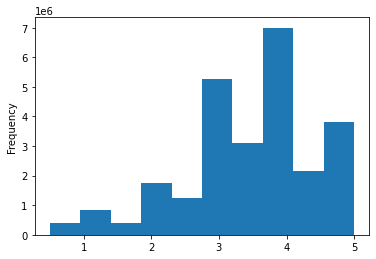

In [210]:
# review statitics and spread of data
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

## Joining Datasets

In [214]:
wiki_movies_df.head(1)
kaggle_metadata.head(1)
ratings.head(1)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,budget,release_date,running_time
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",United States,English,...,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,"20,000,000.00",1990-07-11,102.00


,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"


,userId,movieId,rating,timestamp
0,1,110,1.00,2015-03-09 22:52:09


In [216]:
wiki_movies_df.columns 
kaggle_metadata.columns
ratings.columns

Index(['url', 'year', 'imdb_link', 'title', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Box office',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'budget',
       'release_date', 'running_time'],
      dtype='object')

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [217]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [220]:
movies_df.columns

Index(['url', 'year', 'imdb_link', 'title_wiki', 'Based on', 'Starring',
       'Cinematography', 'Release date', 'Country', 'Language', 'Box office',
       'Director', 'Distributor', 'Editor(s)', 'Composer(s)', 'Producer(s)',
       'Production company(s)', 'Writer(s)', 'imdb_id', 'budget_wiki',
       'release_date_wiki', 'running_time', 'belongs_to_collection',
       'budget_kaggle', 'genres', 'homepage', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date_kaggle',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_kaggle', 'video', 'vote_average', 'vote_count'],
      dtype='object')

> handling with redundant columns

> titles

In [ ]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies

In [223]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [225]:
# review where titles do not match
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [232]:
# Show any rows where titles are empty is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

movies_df[(movies_df['title_wiki'] == '') | (movies_df['title_wiki'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Country,Language,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


> resolution: Drop wiki titles

> runtime 

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

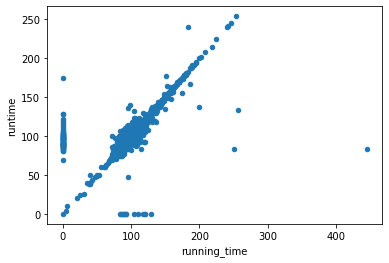

In [234]:
# fill in missing values with 0, so that they are shown when plotting (plots do not show null values by default)
# Any wildly different values will show up as dots far from that central line, and if one column is missing data, those values will fall on the x-axis or y-axis.
# the more values match, the cleaner and more central of a line would be produced
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

> There are more 0 on the y-axis(wiki) than the x_axis(kaggle)<br> 
> most of the runtimes are pretty close to each other but the Wikipedia data has some outliers, <br>
> Resolution: Keep Kaggle; fill in zeros with Wikipedia data.